In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [3]:
End = '2018-11-25'

In [4]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [5]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [6]:
if Min_pozycja > Max_pozycja and Max_pozycja < len(df1)-10:
    
    # Trend spadkowy L1
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a1 = (Ay-By)/(Ax-Bx)
        b1 = By - a1*Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  Wcześniej niż 10 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy')
            print(f'Punkt A:{A}, Punkt C: {C}, a:{a1}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1*Bx
                
        Cx = df11.index.max() +10
        Cy = a1*Cx +b1
        C = [Cx, Cy]

        X_long = [Ax, Cx]
        Y_long = [Ay, Cy]
        
        
# Trend wzrostowy M1
    
    df2 = df1.iloc[Min_pozycja:]
    Max_pozycja2 = df2['High'].argmax()
    Max_idx2 = df2.iloc[Max_pozycja2].name
    
    Ax = df2.iloc[0].name
    Ay = df2['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['Low'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2*Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']>=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['Low'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2*Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C} a:{a2}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['Low'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2*Bx
                
            Cx = df2.index.max() +10
            Cy = a2*Cx +b2
            C = [Cx, Cy]

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]
            

            

Pierwszy trend:  Malejący
Max/Min:  Wcześniej niż 10 dni od końca
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 spadkowy
Punkt A:[17517.0, 20089.0], Punkt C: [17870.0, 5503.879762545228], a:-41.31762106927711
------------------------------------------------------------------------------


IndexError: single positional indexer is out-of-bounds

# Szukamy punktów przecinających linie trendu

In [7]:
Max_idx2

17860.0

In [7]:
df3 = df2[Max_idx2:]
df3['TrendLine'] = df3.index * a2 + b2
df3['Distance(Low-TL)'] = df3['Close'] - df3['TrendLine']

QPointsAfterBrake = df3['Distance(Low-TL)'][df3['Distance(Low-TL)']<0].count()

#Sprawdzamy czy cena przebija linie trendu M1

if QPointsAfterBrake > 0:
    
    ClosingPrice_BP =  df3['Close'][df3['Distance(Low-TL)']<0].iloc[0]
    ClosingPrice_BPPosition = df3.index[df3['Distance(Low-TL)']<0][0]
    PointBeforeBPPosition = ClosingPrice_BPPosition - 1
    PointBeforeBPPrice = df3['Close'].loc[PointBeforeBPPosition]
    TrendPriceBeforeBP  =  PointBeforeBPPosition * a2 + b2

    #Jeśli przebicie w dół:
    if TrendPriceBeforeBP < PointBeforeBPPrice:

        ClosingPrice_BPPositionEnd = df3.index[-1]+5
        BPPrice = ClosingPrice_BPPosition *a2 + b2


        XBP = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
        YBP = [BPPrice, BPPrice]
        XClosingPrice = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
        YClosingPrice = [ClosingPrice_BP, ClosingPrice_BP]
        BPPrice = ClosingPrice_BPPosition *a2 + b2

        print('Przebicie trendu wzrostowego M1 w dół')
        print(f'Punkt przecięcia: {YBP[0]}')
        print(f'Punkt wsparcia: {YClosingPrice[0]}')
        print('---------------------------------------')
        
        # liczymy przełamania cen w korytarzu
        
        df4 = df2[ClosingPrice_BPPosition:]
        df4['DownLine'] = ClosingPrice_BP
        df4['UpLine'] = BPPrice
        df4['Down-Close'] = df4['Close'] - df4['DownLine']
        df4['UP-Close'] = df4['UpLine'] - df4['Close']
        
        DownBreaks = len(df4['Close'][df4['Down-Close'] < 0])
        UpBreaks = len(df4['Close'][df4['UP-Close'] < 0])

        # Jeśli wystąpiło tylko jedno przerwanie:
        if DownBreaks > 0 and UpBreaks ==0:

            BP2Price = df4['Close'][df4['Down-Close'] < 0].iloc[0]
            BP2Possition = df4.index[df4['Down-Close']<0][0]
            BP2 = [BP2Possition, BP2Price]
            print('Second BP founded')
            print(f'BP2Price: {BP2Price}, BP2Position: {BP2Possition}')
            
            # WYKRES: Tunele, BP1, BP2
            
            

            # Jeśli przebicie przekraczające 50% wielkości tunelu:
            
            HeightOfTunel = BPPrice - ClosingPrice_BP
            HeightOfBreak = ClosingPrice_BP - BP2Price
            
            if HeightOfBreak >= 0.5 * HeightOfTunel:
                print('BP2 break Tunel by more than 50% height of tunel')
                print('Short position recomended')
                
                #Wykres: Tunele, BP1, BP2
                
                
            else:
                print('')

        # Jeśli wystąpiło przebicie w górę:        
        elif UpBreaks >0 and DownBreaks ==0:

            BP3Price = df4['Close'][df4['UP-Close'] < 0].iloc[0]
            BP3Position = df4.index[df4['UP-Close'] < 0][0]
            BP3 = [BP3Position, BP3Price]
            print('Third BP founded')
            print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')
            
            #WYKRES: Tunele, BP1 i BP3
            

            # Jeśli  przebicie przekraczające 50% wielkości tunelu:
            
            HeightOfTunel = BPPrice - ClosingPrice_BP
            HeightOfBreak = BP3Price - BPPrice
            
            if HeightOfBreak >= 0.5 * HeightOfTunel:
                print('BP2 break Tunel by more than 50% height of tunel')
                print('Long position recomended')
                
                #WYKRES: Tunele, BP1 i BP3
                
            else:
                print('')

        #Jeśli przebiło w górę i w dół:
        elif DownBreaks > 0 and UpBreaks > 0:

            BP2Price = df4['Close'][df4['Down-Close'] < 0].iloc[0]
            BP2Possition = df4.index[df4['Down-Close']<0][0]

            BP3Price = df4['Close'][df4['UP-Close'] < 0].iloc[0]
            BP3Position = df4.index[df4['UP-Close'] < 0][0]

            #Jeśli przebicie w dół było pierwsze
            if BP2Possition < BP3Position:
                BP1 = [ClosingPrice_BPPosition, BPPrice]
                BP2 = [BP2Possition, ClosingPrice_BP]
                BP3 = [BP3Position, BPPrice]
                
                print('Long Position recomended')
                print(f'First Break Point: {BP1}')
                print(f'Second Break Point: {BP2}')
                print(f'Third and decisive Break Point: {BP3}')
                
                #WYKRES: Tunele, BP1, BP2, BP3

            elif BP2Possition < BP3Position:
                
                
                print('Short Position recomended')
                
    #Jeśli nie nasąpiło przerwanie lini trendu M1            
    else:        
         #Sam wykres z trendami       
        
        else:
            print('There is no BP yet')
        
else:
    print('Brak przecięcia Lini trendu')

Przebicie trendu wzrostowego M1 w dół
Punkt przecięcia: 248.2229920000009
Punkt wsparcia: 211.078995
---------------------------------------
Second BP founded
BP2Price: 210.494995, BP2Position: 16671.0



In [20]:
BP2[1]

210.494995

In [21]:
df5 = df2[BP2[0]:]
df5['TrendLine'] = df5.index * a2 + b2
df5['UpBreakOfTL'] = df5['Close'] - df5['TrendLine']

if len(df5[df5['UpBreakOfTL']>0]) > 0:
    
    BPUPosition = df5.index[df5['UpBreakOfTL']>0][0]
    BPUPrice = df5['Close'][df5['UpBreakOfTL'] > 0].iloc[0]
    
    print('Nastąpiło przerwanie trendu M1 w górę')
    print(f'Pozycja przerwania: {BPUPosition}')
    print(f'Cena przecięcia: {BPUPrice}')
    print('---------------------------------------------')


    df5  = df5[BPUPosition:]

    if len(df5['UpBreakOfTL'] < 0) > 0:

        NextBPPosition = df5.index[df5['UpBreakOfTL'] < 0][0]
        NextBPTLPrice = df5['TrendLine'][df5['UpBreakOfTL'] < 0].iloc[0]
        NextBPClosePrice = df5['Close'][df5['UpBreakOfTL'] < 0].iloc[0]
        NextBPPositionEnd = df5.index[-1]+5

        #Korytarze:

        SecondXBP = [NextBPPosition, NextBPPosition]
        SecondYBP = [NextBPTLPrice, NextBPTLPrice]
        SecondXClosingPrice = [NextBPPosition, NextBPPosition]
        SecondYClosingPrice = [NextBPClosePrice, NextBPClosePrice]



        print('Kolejne przerwanie trendu M1 w dół')
        print(f'Cena przecięcia: {NextBPTLPrice}')
        print(f'Pozycja przecięcia: {NextBPPosition}')
        print(f'Poziom wsparcia: {NextBPClosePrice}')
        print('---------------------------------------------')

        # liczymy przełamania cen w korytarzu
        
        df6 = df2[NextBPPosition:]
        df6['DownLine2'] = NextBPClosePrice
        df6['UpLine2'] = NextBPTLPrice
        df6['Down-Close2'] = df6['Close'] - df6['DownLine2']
        df6['UP-Close2'] = df6['UpLine2'] - df6['Close']

        SecondDownBreaks = len(df6['Close'][df6['Down-Close2'] < 0])
        SecondUpBreaks = len(df6['Close'][df6['UP-Close2'] < 0])

        if SecondDownBreaks > 0 and SecondUpBreaks ==0:

            SecondBP2Price = df6['Close'][df6['Down-Close2'] < 0].iloc[0]
            SecondBP2Possition = df6.index[df6['Down-Close2']<0][0]
            print('Second BP founded in second break')
            print(f'Second BP2Price: {SecondBP2Price}, Second BP2Position: {SecondBP2Possition}')

            # przebicie przekraczające 50% wielkości tunelu:
            
            HeightOfTunel = NextBPTLPrice - NextBPClosePrice
            HeightOfBreak = NextBPClosePrice - SecondBP2Price
            
            if HeightOfBreak >= 0.5 * HeightOfTunel:
                print('Second BP2 break Tunel by more than 50% height of tunel')
                print('Short position recomended')
            else:
                print('')

        elif SecondUpBreaks >0 and SecondDownBreaks ==0:

            SecondBP3Price = df6['Close'][df6['UP-Close2'] < 0].iloc[0]
            SecondBP3Position = df6.index[df6['UP-Close2'] < 0][0]
            print('Third BP founded in second break')
            print(f'Second BP3Price: {SecondBP3Price}, Second BP3Position: {SecondBP3Position}')

            # przebicie przekraczające 50% wielkości tunelu:

            HeightOfTunel = NextBPTLPrice - NextBPClosePrice
            HeightOfBreak = SecondBP3Price - NextBPTLPrice
            
            if HeightOfBreak >= 0.5 * HeightOfTunel:
                print('Second BP3 break Tunel by more than 50% height of tunel')
                print('Long position recomended')
            else:
                print('')


        elif DownBreaks > 0 and UpBreaks > 0:

            SecondBP2Price = df6['Close'][df4['Down-Close2'] < 0].iloc[0]
            SecondBP2Possition = df6.index[df4['Down-Close2']<0][0]

            SecondBP3Price = df6['Close'][df4['UP-Close2'] < 0].iloc[0]
            SecondBP3Position = df6.index[df4['UP-Close2'] < 0][0]

            if SecondBP2Possition < SecondBP3Position:
                SecondBP1 = [ClosingPrice_BPPosition, BPPrice]
                SecondBP2 = [BP2Possition, ClosingPrice_BP]
                SecondBP3 = [BP3Position, BPPrice]

                print('Long Position recomended')
                print(f'First Break Point: {SecondBP1}')
                print(f'Second Break Point: {SecondBP2}')
                print(f'Third and decisive Break Point: {SecondBP3}')

            elif SecondBP2Possition < SecondBP3Position:
                print('Short Position recomended')

    else:
        print('Brak kolejnych przełamań na lini M1 cena w dół')
    
else:
    print('Cena nie przeciełą trendu M1')

Cena nie przeciełą trendu M1


In [ ]:
SecondBP1 = [ClosingPrice_BPPosition, BPPrice]
SecondBP2 = [BP2Possition, ClosingPrice_BP]
SecondBP3 = [BP3Position, BPPrice]

In [ ]:
BP1 = [ClosingPrice_BPPosition, BPPrice]
BP2 = [BP2Possition, ClosingPrice_BP]
BP3 = [BP3Position, BPPrice]

In [8]:
df1.reset_index(inplace = True)
df2.reset_index(inplace = True)
'''df5.reset_index(inplace = True)'''

'df5.reset_index(inplace = True)'

NameError: name 'X_mid1' is not defined

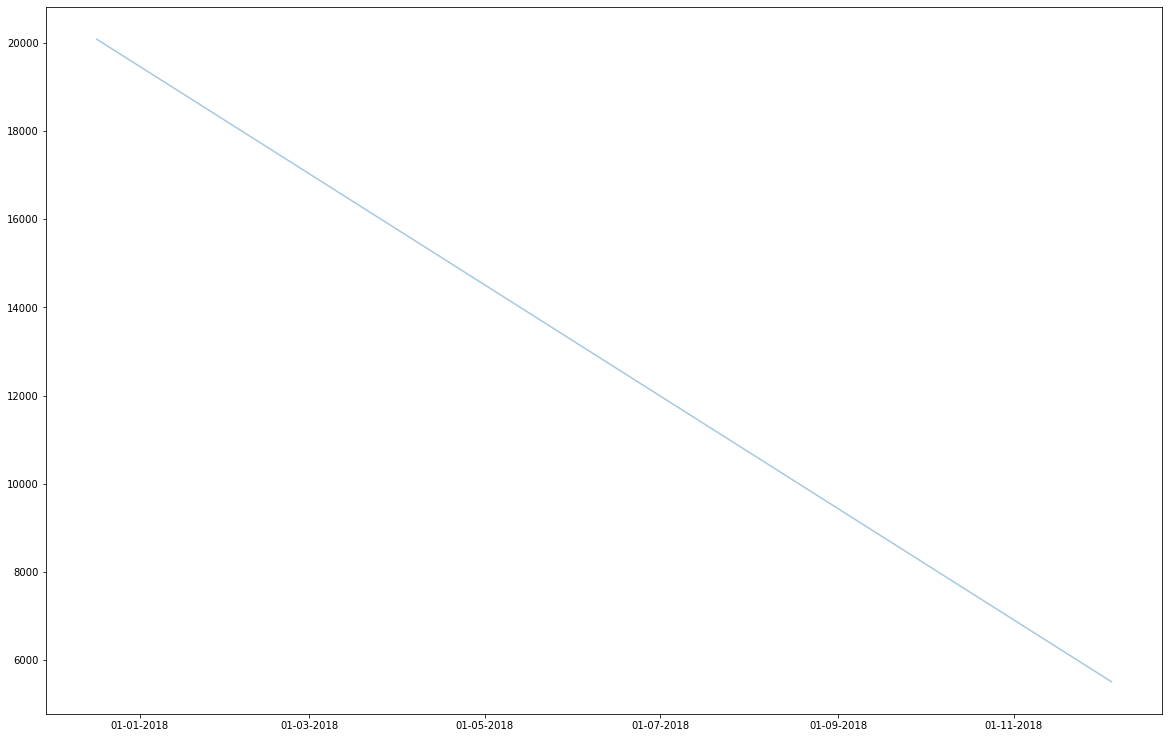

In [9]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
'''ax3 = fig.add_subplot(111)'''


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

'''ax3.plot(XBPU, YBPU, color='black', alpha = 0.4)
ax3.plot(XOpen, YOpen, color='black', alpha = 0.5)'''




plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()

In [180]:
UpBreaks

0

In [193]:
df1.reset_index(inplace = True)
df2.reset_index(inplace = True)
df3.reset_index(inplace = True)
df4.reset_index(inplace = True)

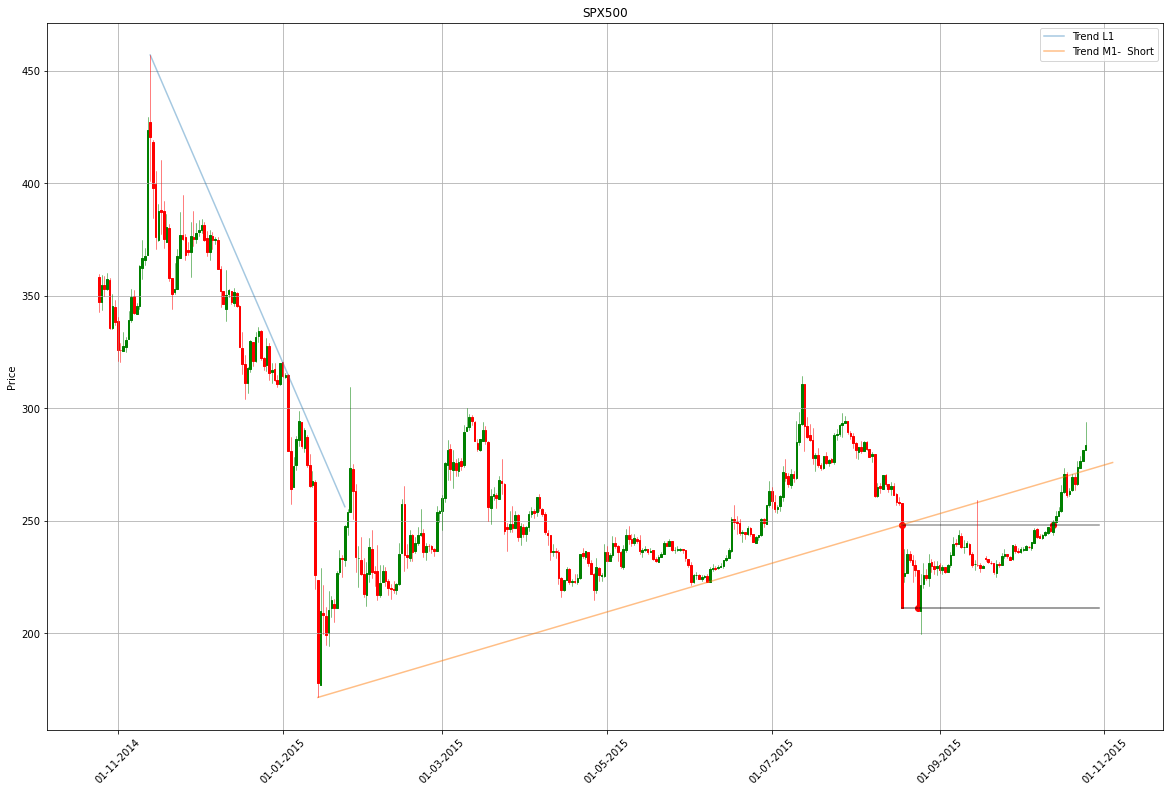

In [194]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)
ax5 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

ax3.plot(XBP, YBP, color='black', alpha = 0.4)
ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)

ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )



plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()